### 美国总统大选数据分析项目

导入包

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

方便大家操作，将月份和参选人以及所在政党进行定义

In [4]:
# 月份
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}

# 候选人
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']

# 候选人所在党派party
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

读取文件

In [5]:
# 因为数据列有混合类型，读取的时候Pandas默认要找到可以使所占空间最小的类型。
# low_memory=False ： Pandas就不会去找低内存（占用空间小）的类型，直接使用较大内存的类型

usa = pd.read_csv(r'data\13_美国总统大选数据分析项目\usa_election.csv', low_memory=False)
usa.head()


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


查看文件样式以及基本信息

In [6]:
usa['party'] = usa['cand_nm'].map(parties)
usa.head()
usa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536041 entries, 0 to 536040
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            536041 non-null  object 
 1   cand_id            536041 non-null  object 
 2   cand_nm            536041 non-null  object 
 3   contbr_nm          536041 non-null  object 
 4   contbr_city        536026 non-null  object 
 5   contbr_st          536040 non-null  object 
 6   contbr_zip         535973 non-null  object 
 7   contbr_employer    525088 non-null  object 
 8   contbr_occupation  530520 non-null  object 
 9   contb_receipt_amt  536041 non-null  float64
 10  contb_receipt_dt   536041 non-null  object 
 11  receipt_desc       8479 non-null    object 
 12  memo_cd            49718 non-null   object 
 13  memo_text          52740 non-null   object 
 14  form_tp            536041 non-null  object 
 15  file_num           536041 non-null  int64  
 16  pa

【知识点】使用map函数+字典，新建一列各个候选人所在党派party

查看单独一行，是否加上了'party'一列

In [7]:
usa.head(1)  # 查看第一行以确认新增的party列


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


使用np.unique()函数查看colums：party这一列中有哪些元素

In [8]:
np.unique(usa['party'])

array(['Democrat', 'Libertarian', 'Reform', 'Republican'], dtype=object)

使用value_counts()函数，统计party列中各个元素出现次数

In [9]:
usa['party'].value_counts()


party
Democrat       292400
Republican     237575
Reform           5364
Libertarian       702
Name: count, dtype: int64

【知识点】使用groupby()函数，查看各个党派收到的政治献金总数contb_receipt_amt

In [10]:
usa.groupby('party')['contb_receipt_amt'].sum()


party
Democrat       8.105758e+07
Libertarian    4.132769e+05
Reform         3.390338e+05
Republican     1.192255e+08
Name: contb_receipt_amt, dtype: float64

查看日期格式，并将其转换为Pandas的日期格式,通过函数加map方式进行转换

In [24]:
# 查看原始日期格式
print("原始日期格式：")
print(usa['contb_receipt_dt'].head())

# 定义日期格式列表
date_formats = [
    '%d-%b-%y',  # 20-JUN-11
    '%d/%b/%y',  # 20/JUN/11
    '%d-%b-%Y',  # 20-JUN-2011
    '%d/%b/%Y',  # 20-JUN/2011
    '%m/%d/%Y',  # 06/20/2011
    '%m-%d-%Y',  # 06-20-2011
    '%d/%m/%Y',  # 20/06/2011
    '%d-%m-%Y',  # 20-06-2011
    '%Y-%m-%d',  # 2011-06-20
    '%d %b %Y',  # 20 JUN 2011
    '%d %b %y',  # 20 JUN 11
    '%b %d %Y',  # JUN 20 2011
    '%b %d, %Y',  # JUN 20, 2011
    '%b-%d-%Y',  # JUN-20-2011
    '%b/%d/%Y',  # JUN/20/2011
    '%d %B %Y',  # 20 June 2011
    '%B %d, %Y',  # June 20, 2011
    '%B %d %Y',  # June 20 2011
    '%d-%B-%Y',  # 20-June-2011
    '%d/%B/%Y',  # 20-June-2011
]

# 定义转换函数
def try_convert_date(date_str):
    for date_format in date_formats:
        try:
            return pd.to_datetime(date_str, format=date_format)
        except ValueError:
            continue
    return np.nan

# 使用 map 和自定义函数尝试转换日期格式
usa['contb_receipt_dt_converted'] = usa['contb_receipt_dt'].map(try_convert_date)

# 查看转换后的结果
print("\n转换后的结果：")
print(usa[['contb_receipt_dt', 'contb_receipt_dt_converted']].head())

原始日期格式：
478480   2011-01-01
475327   2011-01-01
475328   2011-01-01
478481   2011-01-03
475329   2011-01-03
Name: contb_receipt_dt, dtype: datetime64[ns]

转换后的结果：
       contb_receipt_dt contb_receipt_dt_converted
478480       2011-01-01                 2011-01-01
475327       2011-01-01                 2011-01-01
475328       2011-01-01                 2011-01-01
478481       2011-01-03                 2011-01-03
475329       2011-01-03                 2011-01-03


查看是否转换成功

In [25]:
# 查看是否转换成功
print("\n转换后的结果：")
print(usa['contb_receipt_dt_converted'].head())


转换后的结果：
478480   2011-01-01
475327   2011-01-01
475328   2011-01-01
478481   2011-01-03
475329   2011-01-03
Name: contb_receipt_dt_converted, dtype: datetime64[ns]


将时间转换为时间数据类型  
根据时间进行排序

In [26]:
usa['contb_receipt_dt'] = pd.to_datetime(usa['contb_receipt_dt'], format='%b %d %Y')
usa = usa.sort_values('contb_receipt_dt')
print("\n查看排序后的结果：")
print(usa.head())



查看排序后的结果：
          cmte_id    cand_id       cand_nm            contbr_nm contbr_city  \
478480  C00496067  P00003608  Cain, Herman          MAREK, JOHN    WAUKESHA   
475327  C00496067  P00003608  Cain, Herman   STOLTENBERG, WAYNE    WESTLAKE   
475328  C00496067  P00003608  Cain, Herman       TRIBBLE, JAMES     HOUSTON   
478481  C00496067  P00003608  Cain, Herman        SIDNEY, SCOTT   CEDARBURG   
475329  C00496067  P00003608  Cain, Herman  DAVIS, JEREMY S MR.     HOUSTON   

       contbr_st contbr_zip                  contbr_employer  \
478480        WI  531899772            INFORMATION REQUESTED   
475327        TX  762629076                  CINCO RESOURCES   
475328        TX  770795026                             NONE   
478481        WI  530122317                    SELF EMPLOYED   
475329        TX  770252267  INTL PETROLEUM ASSOC OF AMERICA   

            contbr_occupation  contb_receipt_amt contb_receipt_dt  \
478480  INFORMATION REQUESTED             2400.0       2011-

得到转换后的，每天各政党所收政治献金数目。  

考察知识点：groupby（多个字段）

In [27]:
# 得到转换后的，每天各政党所收政治献金数目

daily_donations = usa.groupby(['contb_receipt_dt', 'party'])['contb_receipt_amt'].sum().reset_index()

# 查看结果

print("\n每天各政党所收政治献金数目：")

print(daily_donations.head())




每天各政党所收政治献金数目：
  contb_receipt_dt       party  contb_receipt_amt
0       2011-01-01  Republican             8600.0
1       2011-01-03  Republican             4800.0
2       2011-01-04  Republican             5000.0
3       2011-01-12  Republican             4150.0
4       2011-01-13  Republican             4000.0


【知识点】使用unstack()将上面所得数据中的party从一级索引变成列索引,unstack('party')

In [40]:
# 使用 unstack() 将上面所得数据中的 party 从一级索引变成列索引
daily_donations_unstacked = daily_donations.set_index(['contb_receipt_dt', 'party']).unstack('party', fill_value=0)

# 查看结果
print("\nunstack后的结果：")
print(daily_donations_unstacked.head())


unstack后的结果：
                 contb_receipt_amt                              
party                     Democrat Libertarian Reform Republican
contb_receipt_dt                                                
2011-01-01                     0.0         0.0    0.0     8600.0
2011-01-03                     0.0         0.0    0.0     4800.0
2011-01-04                     0.0         0.0    0.0     5000.0
2011-01-12                     0.0         0.0    0.0     4150.0
2011-01-13                     0.0         0.0    0.0     4000.0


使用上面获取的数据  
画出各党派累计政治献金,cumsum()累加函数


 累计政治献金的结果：
                 contb_receipt_amt                              
party                     Democrat Libertarian Reform Republican
contb_receipt_dt                                                
2011-01-01                     0.0         0.0    0.0     8600.0
2011-01-03                     0.0         0.0    0.0    13400.0
2011-01-04                     0.0         0.0    0.0    18400.0
2011-01-12                     0.0         0.0    0.0    22550.0
2011-01-13                     0.0         0.0    0.0    26550.0


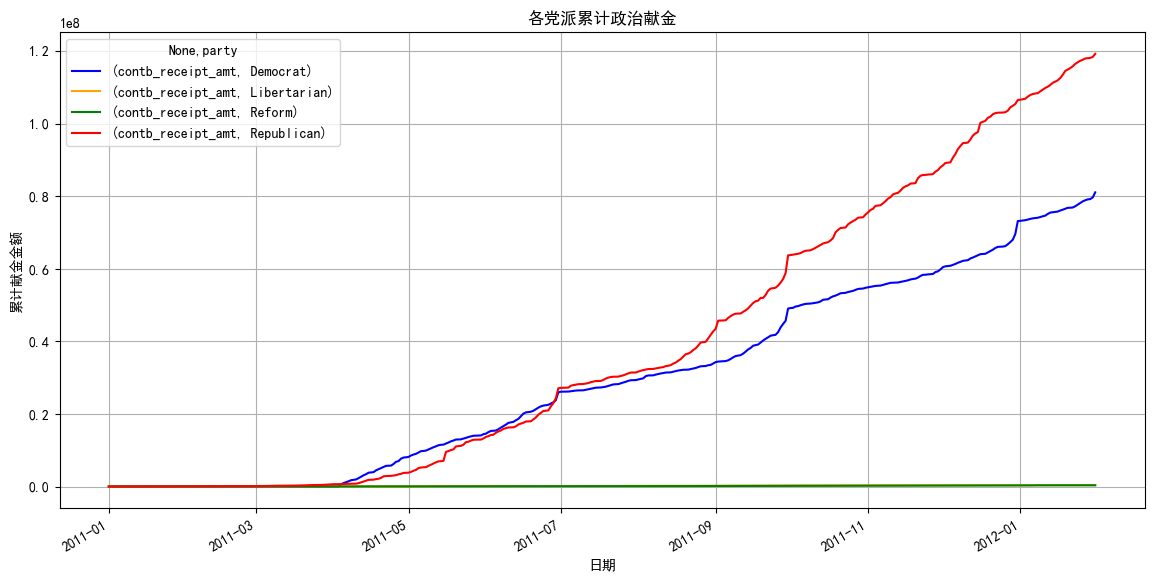


 民主党在每一天的具体献金记录：
          cmte_id    cand_id        cand_nm           contbr_nm  contbr_city  \
166273  C00431445  P80003338  Obama, Barack        THOMAS, JANE      CHICAGO   
70874   C00431445  P80003338  Obama, Barack         CHOY, CHRIS  LOS ANGELES   
166280  C00431445  P80003338  Obama, Barack  SCHWARTZ, BENJAMIN      CHICAGO   
166283  C00431445  P80003338  Obama, Barack       THEIS, JOHN K      CHICAGO   
166218  C00431445  P80003338  Obama, Barack   WLEKLINSKI, CAROL     EVANSTON   

       contbr_st contbr_zip                    contbr_employer  \
166273        IL  606017923                            RETIRED   
70874         CA      90068                  CHRIS CHOY DESIGN   
166280        IL      60614                   ALTHEIMER & GRAY   
166283        IL  606225001  EIMER STAHL KLEVORN & SOLBERG LLP   
166218        IL  602022490                            RETIRED   

        contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc  \
166273            RETIRED 

C:\Users\11322\AppData\Local\Temp\ipykernel_2136\1184462159.py:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  daily_donations_unstacked.loc['2011-01-01', 'contb_receipt_amt']['Democrat'] = 0.0
C:\Users\11322\AppData\Local\Temp\ipykernel_2

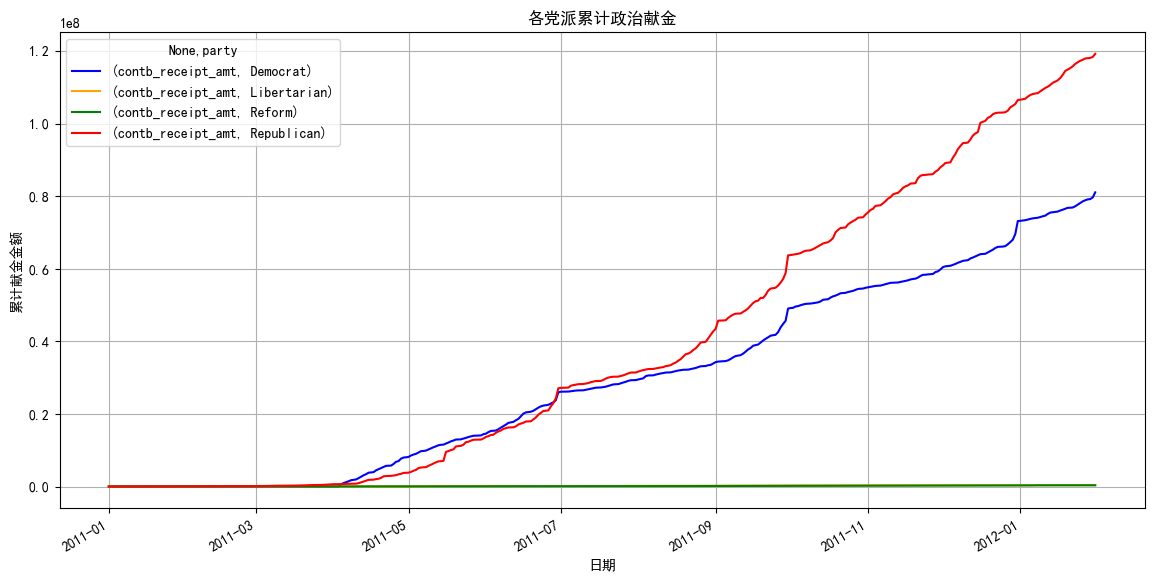

In [44]:
# 使用上面获取的数据  
# 画出各党派累计政治献金,cumsum()累加函数
cumulative_donations = daily_donations_unstacked.cumsum()

# 查看累计结果
print("\n 累计政治献金的结果：")
print(cumulative_donations.head())

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 选择合适的中文字体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 画出各党派累计政治献金
cumulative_donations.plot(figsize=(14, 7), color=['blue', 'orange', 'green', 'red'])
plt.title('各党派累计政治献金')
plt.xlabel('日期')
plt.ylabel('累计献金金额')
plt.grid(True)
plt.show()

# 检查民主党在每一天的具体献金记录
democrat_records = usa[usa['party'] == 'Democrat']
print("\n 民主党在每一天的具体献金记录：")
print(democrat_records.head())

# 如果民主党在某些日期没有收到献金，手动将这些日期的金额设置为0
# 假设民主党在 2011-01-01 和 2011-01-03 没有收到献金
daily_donations_unstacked.loc['2011-01-01', 'contb_receipt_amt']['Democrat'] = 0.0
daily_donations_unstacked.loc['2011-01-03', 'contb_receipt_amt']['Democrat'] = 0.0

# 再次计算累计政治献金
cumulative_donations = daily_donations_unstacked.cumsum()

# 查看累计结果
print("\n 手动处理后的累计政治献金的结果：")
print(cumulative_donations.head())

# 画出各党派累计政治献金
cumulative_donations.plot(figsize=(14, 7), color=['blue', 'orange', 'green', 'red'])
plt.title('各党派累计政治献金')
plt.xlabel('日期')
plt.ylabel('累计献金金额')
plt.grid(True)
plt.show()

把时间作为列，党派作为行来观察,unstack('contb_receipt')

In [45]:
# 使用 unstack('contb_receipt_dt') 将日期从一级索引变成列索引，党派作为行
daily_donations_pivot = daily_donations.set_index(['contb_receipt_dt', 'party'])['contb_receipt_amt'].unstack('contb_receipt_dt', fill_value=0)

# 查看结果
print("\n 将日期作为列，党派作为行后的结果：")
print(daily_donations_pivot.head())


 将日期作为列，党派作为行后的结果：
contb_receipt_dt  2011-01-01  2011-01-03  2011-01-04  2011-01-12  2011-01-13  \
party                                                                          
Democrat                 0.0         0.0         0.0         0.0         0.0   
Libertarian              0.0         0.0         0.0         0.0         0.0   
Reform                   0.0         0.0         0.0         0.0         0.0   
Republican            8600.0      4800.0      5000.0      4150.0      4000.0   

contb_receipt_dt  2011-01-14  2011-01-15  2011-01-16  2011-01-17  2011-01-18  \
party                                                                          
Democrat                 0.0         0.0         0.0         0.0         0.0   
Libertarian              0.0         0.0         0.0         0.0         0.0   
Reform                   0.0         0.0         0.0         0.0         0.0   
Republican            6000.0       500.0       750.0       500.0      4800.0   

contb_receipt_dt  

使用stack()把party变成二级行索引,注意所有的值都不能为nan，需要填充为0

In [53]:
# 使用 stack() 将 party 变成二级行索引
daily_donations_stacked = daily_donations_pivot.stack()

# 查看结果
print("\n 使用 stack() 后的结果：")
print(daily_donations_stacked.head())


 使用 stack() 后的结果：
party     contb_receipt_dt
Democrat  2011-01-01          0.0
          2011-01-03          0.0
          2011-01-04          0.0
          2011-01-12          0.0
          2011-01-13          0.0
dtype: float64


查看候选人姓名cand_nm和政治献金捐献者职业contbr_employer，以及捐献情况。能看出各个候选人主要的支持者分布情况  
练习：groupy，sum()求和

In [54]:
# 查看候选人姓名cand_nm和政治献金捐献者职业contbr_employer，以及捐献情况
# 练习：groupby，sum()求和

# 按候选人姓名和捐献者职业分组，并求和
support_distribution = usa.groupby(['cand_nm', 'contbr_employer'])['contb_receipt_amt'].sum().reset_index()

# 查看结果
print("\n 候选人姓名和捐献者职业的累计献金：")
print(support_distribution.head())

# 如果需要查看每个候选人的主要支持者分布情况，可以进一步处理
# 例如，找出每个候选人捐赠者中捐赠金额最大的职业以及捐献额

# 找出每个候选人的捐赠者中捐赠金额最大的职业以及捐献额
main_supporters = support_distribution.groupby('cand_nm').apply(lambda x: x.nlargest(1, 'contb_receipt_amt')).reset_index(drop=True)

# 查看结果
print("\n 每个候选人的主要支持者分布情况：")
print(main_supporters.head())



 候选人姓名和捐献者职业的累计献金：
              cand_nm                contbr_employer  contb_receipt_amt
0  Bachmann, Michelle                              '             1996.0
1  Bachmann, Michelle                      (RETIRED)              394.0
2  Bachmann, Michelle                            ---              100.0
3  Bachmann, Michelle                              0              100.0
4  Bachmann, Michelle  1 SQUARED R ELEMENT CO., INC.             2500.0

 每个候选人的主要支持者分布情况：
              cand_nm                         contbr_employer  \
0  Bachmann, Michelle                   INFORMATION REQUESTED   
1        Cain, Herman                   INFORMATION REQUESTED   
2      Gingrich, Newt                                 RETIRED   
3       Huntsman, Jon  INFORMATION REQUESTED PER BEST EFFORTS   
4  Johnson, Gary Earl                                 RETIRED   

   contb_receipt_amt  
0          175203.89  
1         3909226.59  
2         2294897.21  
3          378749.00  
4           80308.96  


C:\Users\11322\AppData\Local\Temp\ipykernel_2136\2993188326.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  main_supporters = support_distribution.groupby('cand_nm').apply(lambda x: x.nlargest(1, 'contb_receipt_amt')).reset_index(drop=True)


查看老兵主要支持谁：DISABLED VETERAN  
考察Series索引

In [55]:
# 查看老兵主要支持谁：DISABLED VETERAN  
# 考察Series索引

# 过滤出捐献者职业为 DISABLED VETERAN 的记录
disabled_veteran_donations = usa[usa['contbr_employer'] == 'DISABLED VETERAN']

# 查看结果
print("\n 捐献者职业为 DISABLED VETERAN 的记录：")
print(disabled_veteran_donations.head())

# 按候选人姓名分组，并求和
veteran_support_distribution = disabled_veteran_donations.groupby('cand_nm')['contb_receipt_amt'].sum()

# 查看结果
print("\n 每个候选人的累计献金（来自 DISABLED VETERAN）：")
print(veteran_support_distribution)

# 找出累计献金金额最大的候选人
main_supporter_veteran = veteran_support_distribution.idxmax()
main_supporter_veteran_amount = veteran_support_distribution.max()

# 查看结果
print(f"\n 老兵主要支持的候选人是：{main_supporter_veteran}，累计献金金额为：{main_supporter_veteran_amount}")



 捐献者职业为 DISABLED VETERAN 的记录：
          cmte_id    cand_id        cand_nm         contbr_nm contbr_city  \
260154  C00431445  P80003338  Obama, Barack      NOLAN, DIANA    SPRAKERS   
260544  C00431445  P80003338  Obama, Barack      NOLAN, DIANA    SPRAKERS   
264154  C00431445  P80003338  Obama, Barack      NOLAN, DIANA    SPRAKERS   
388928  C00495820  P80000748      Paul, Ron  HARPER, RON GENE     OSCEOLA   
389100  C00495820  P80000748      Paul, Ron  HARPER, RON GENE     OSCEOLA   

       contbr_st contbr_zip   contbr_employer contbr_occupation  \
260154        NY      12166  DISABLED VETERAN  DISABLED VETERAN   
260544        NY      12166  DISABLED VETERAN  DISABLED VETERAN   
264154        NY      12166  DISABLED VETERAN  DISABLED VETERAN   
388928        IA  502138366  DISABLED VETERAN           RETIRED   
389100        IA  502138366  DISABLED VETERAN           RETIRED   

        contb_receipt_amt contb_receipt_dt receipt_desc memo_cd memo_text  \
260154               50.0 

把索引变成列,Series.reset_index()

In [56]:
# 使用 Series.reset_index() 将索引变成列
veteran_support_distribution_reset = veteran_support_distribution.reset_index()

# 查看结果
print("\n 使用 Series.reset_index() 后的结果：")
print(veteran_support_distribution_reset.head())


 使用 Series.reset_index() 后的结果：
         cand_nm  contb_receipt_amt
0  Obama, Barack              685.0
1      Paul, Ron              395.0


找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额  

通过query("查询条件来查找捐献人职业")

In [57]:
# 找出各个候选人的捐赠者中，捐赠金额最大的人的职业以及捐献额  
# 通过query("查询条件来查找捐献人职业")

# 按候选人姓名分组，并找到每个候选人捐赠金额最大的记录
max_donations_per_candidate = usa.groupby('cand_nm').apply(lambda x: x.nlargest(1, 'contb_receipt_amt')).reset_index(drop=True)

# 查看结果
print("\n 每个候选人的捐赠者中，捐赠金额最大的记录：")
print(max_donations_per_candidate.head())

# 使用 Series.reset_index() 将索引变成列
max_donations_reset = max_donations_per_candidate.reset_index(drop=True)

# 查看结果
print("\n 使用 Series.reset_index() 后的结果：")
print(max_donations_reset.head())


 每个候选人的捐赠者中，捐赠金额最大的记录：
     cmte_id    cand_id             cand_nm              contbr_nm  \
0  C00497511  P20002978  Bachmann, Michelle         LIBERAL, NICOL   
1  C00496067  P00003608        Cain, Herman              HILDE, AL   
2  C00496497  P60003654      Gingrich, Newt  POPE, MARK C. MR. III   
3  C00498444  P20003067       Huntsman, Jon       PARKIN, JENNIFER   
4  C00495622  P20002671  Johnson, Gary Earl          LEONG, SANDRA   

      contbr_city contbr_st contbr_zip        contbr_employer  \
0        BROOKLYN        NY  112265510       FREEDOM ALLIANCE   
1         JACKSON        WY  830019347  INFORMATION REQUESTED   
2         ATLANTA        GA  303051050                RETIRED   
3  SALT LAKE CITY        UT  841082537              HOMEMAKER   
4        NEW YORK        NY      10010          SELF-EMPLOYED   

       contbr_occupation  contb_receipt_amt contb_receipt_dt  \
0      GOVERNMENT MEMBER             3022.0       2011-12-27   
1  INFORMATION REQUESTED            

C:\Users\11322\AppData\Local\Temp\ipykernel_2136\33380860.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_donations_per_candidate = usa.groupby('cand_nm').apply(lambda x: x.nlargest(1, 'contb_receipt_amt')).reset_index(drop=True)
